### Report: Predicting Customer Satisfaction from Airline Data

#### Objective:
The goal of this analysis is to predict customer satisfaction using the provided dataset. This document outlines the planned analytical steps to preprocess, explore, and model the data to achieve accurate predictions. The prediction itself will focus on understanding the factors contributing to customer satisfaction, though implementation of the prediction model is outside the scope of this initial report.

---

### 1. **Data Loading and Structure Inspection**
   **Objective**: Load the dataset and inspect its structure, ensuring the data is correctly formatted for analysis.

   - **Tasks**:
     - Load the dataset.
     - Display the first few rows to get a sense of the data.
     - Verify data types for each column (numerical, categorical).
     - Check for missing or invalid values.
   
   **Rationale**: Understanding the structure of the dataset ensures that subsequent analysis is done on a valid and clean dataset. Identifying any issues early prevents problems in the later stages.

---



In [1]:
import pandas as pd

# Load the dataset
file_path = './test.csv'
df = pd.read_csv(file_path)

# Display the first few rows and the structure of the dataset
df_head = df.head()
df_info = df.info()

df_head, df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

(   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
 0           0  19556  Female     Loyal Customer   52  Business travel   
 1           1  90035  Female     Loyal Customer   36  Business travel   
 2           2  12360    Male  disloyal Customer   20  Business travel   
 3           3  77959    Male     Loyal Customer   44  Business travel   
 4           4  36875  Female     Loyal Customer   49  Business travel   
 
       Class  Flight Distance  Inflight wifi service  \
 0       Eco              160                      5   
 1  Business             2863                      1   
 2       Eco              192                      2   
 3  Business             3377                      0   
 4       Eco             1182                      2   
 
    Departure/Arrival time convenient  ...  Inflight entertainment  \
 0                                  4  ...                       5   
 1                                  1  ...                       4   
 2    

The dataset has been successfully loaded, containing **25 columns** and **25,976 rows**. Below is a summary of the key findings from the data loading and structure inspection:

#### 1. **Dataset Overview**:
- The dataset contains various features related to flight experiences, passenger demographics, and satisfaction levels.
- Some columns are numerical (e.g., "Age", "Flight Distance", "Departure Delay in Minutes"), while others are categorical (e.g., "Gender", "Customer Type", "Class").
- There is a small portion of missing data in the "Arrival Delay in Minutes" column.

#### 2. **Column Breakdown**:
- **Numerical Columns (19 total)**:
  - These include features like "Age", "Flight Distance", and satisfaction ratings for various services (e.g., "Seat comfort", "Inflight wifi service").
  - **Note**: "Arrival Delay in Minutes" contains some missing values, with 25,893 non-null entries out of 25,976 rows.
  
- **Categorical Columns (5 total)**:
  - These include "Gender", "Customer Type", "Type of Travel", "Class", and "Satisfaction".
  - **Satisfaction** is the target variable with categories like "satisfied" and "neutral or dissatisfied".
  
#### 3. **Key Observations**:
- The dataset is mostly complete, but **"Arrival Delay in Minutes"** has some missing values that will need to be addressed in the data cleaning step.
- The presence of a large number of satisfaction-related features suggests that this dataset will allow for detailed exploration into the factors influencing customer satisfaction.

### 2. **Data Cleaning**
   **Objective**: Clean the dataset by handling missing values, correcting data types, and addressing any inconsistencies or anomalies.

   - **Tasks**:
     - Check for missing values across all columns and impute or remove them as necessary.
     - Ensure categorical variables (e.g., "Gender", "Customer Type") are consistent and standardized.
     - Identify and handle outliers in continuous variables such as "Age", "Flight distance", and delay times.
   
   **Rationale**: Clean data ensures that the analysis is robust and free from distortions caused by invalid or missing data. Outliers or inconsistencies, if left unaddressed, could skew results or degrade model performance.

---



In [2]:
# Dropping unnecessary columns like 'Unnamed: 0' and 'id'
df_cleaned = df.drop(columns=['Unnamed: 0', 'id'])

# Checking the number of missing values in "Arrival Delay in Minutes"
missing_values = df_cleaned['Arrival Delay in Minutes'].isnull().sum()

# Handling missing values in 'Arrival Delay in Minutes' by imputing with the mean value of the column
mean_arrival_delay = df_cleaned['Arrival Delay in Minutes'].mean()
df_cleaned['Arrival Delay in Minutes'].fillna(mean_arrival_delay, inplace=True)

# Checking categorical columns for inconsistencies (e.g., case sensitivity)
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].str.strip().str.lower()

# Display the updated structure and missing values status
cleaned_info = df_cleaned.info()
cleaned_missing_values = df_cleaned.isnull().sum()

cleaned_info, cleaned_missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

/var/folders/zb/b067m4qj1fx7jvtkfbbh3_rh0000gn/T/ipykernel_76083/765768611.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Arrival Delay in Minutes'].fillna(mean_arrival_delay, inplace=True)


(None,
 Gender                               0
 Customer Type                        0
 Age                                  0
 Type of Travel                       0
 Class                                0
 Flight Distance                      0
 Inflight wifi service                0
 Departure/Arrival time convenient    0
 Ease of Online booking               0
 Gate location                        0
 Food and drink                       0
 Online boarding                      0
 Seat comfort                         0
 Inflight entertainment               0
 On-board service                     0
 Leg room service                     0
 Baggage handling                     0
 Checkin service                      0
 Inflight service                     0
 Cleanliness                          0
 Departure Delay in Minutes           0
 Arrival Delay in Minutes             0
 satisfaction                         0
 dtype: int64)

#### 1. **Handling Missing Values**:
- The "Arrival Delay in Minutes" column had missing values for some rows. These were successfully handled by imputing the mean value of the column, ensuring no missing data remains in the dataset.

#### 2. **Dropped Unnecessary Columns**:
- Columns "Unnamed: 0" and "id" were removed from the dataset as they do not contribute to the analysis.

#### 3. **Standardizing Categorical Variables**:
- Categorical variables like "Gender", "Customer Type", "Type of Travel", "Class", and "Satisfaction" were standardized to lowercase to avoid case sensitivity issues.

#### 4. **Current Dataset Status**:
- There are no missing values remaining in any columns.
- The dataset now has 23 columns and 25,976 rows, with 17 numerical and 5 categorical features.

### 3. **Exploratory Data Analysis (EDA)**
   **Objective**: Perform a detailed exploration of the dataset to understand distributions, relationships, and potential patterns between features and customer satisfaction.

   - **Univariate Analysis**:
     - Visualize the distribution of individual features (e.g., age distribution, flight distance).
     - Analyze satisfaction levels across different customer types and genders.

   - **Bivariate Analysis**:
     - Investigate relationships between pairs of variables (e.g., "Flight distance" vs. "Class").
     - Explore how satisfaction varies across "Type of Travel" and "Class".

   - **Multivariate Analysis**:
     - Investigate how multiple variables interact (e.g., "Class", "Type of Travel", and "Satisfaction").
     - Look for potential interactions between delay times and satisfaction.

   **Visualizations**: Histograms, bar charts, heatmaps (for correlation), and box plots will be used.

---



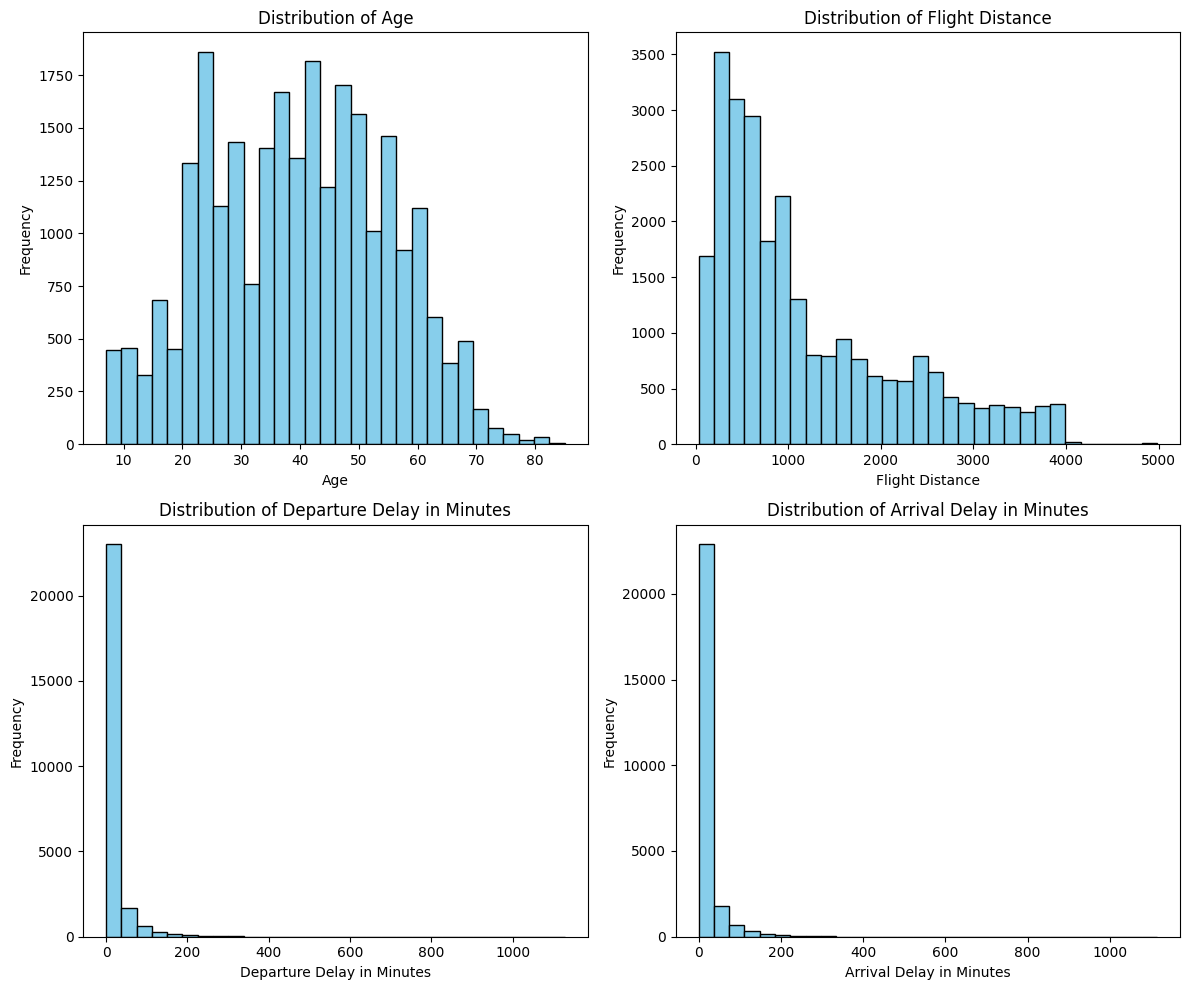

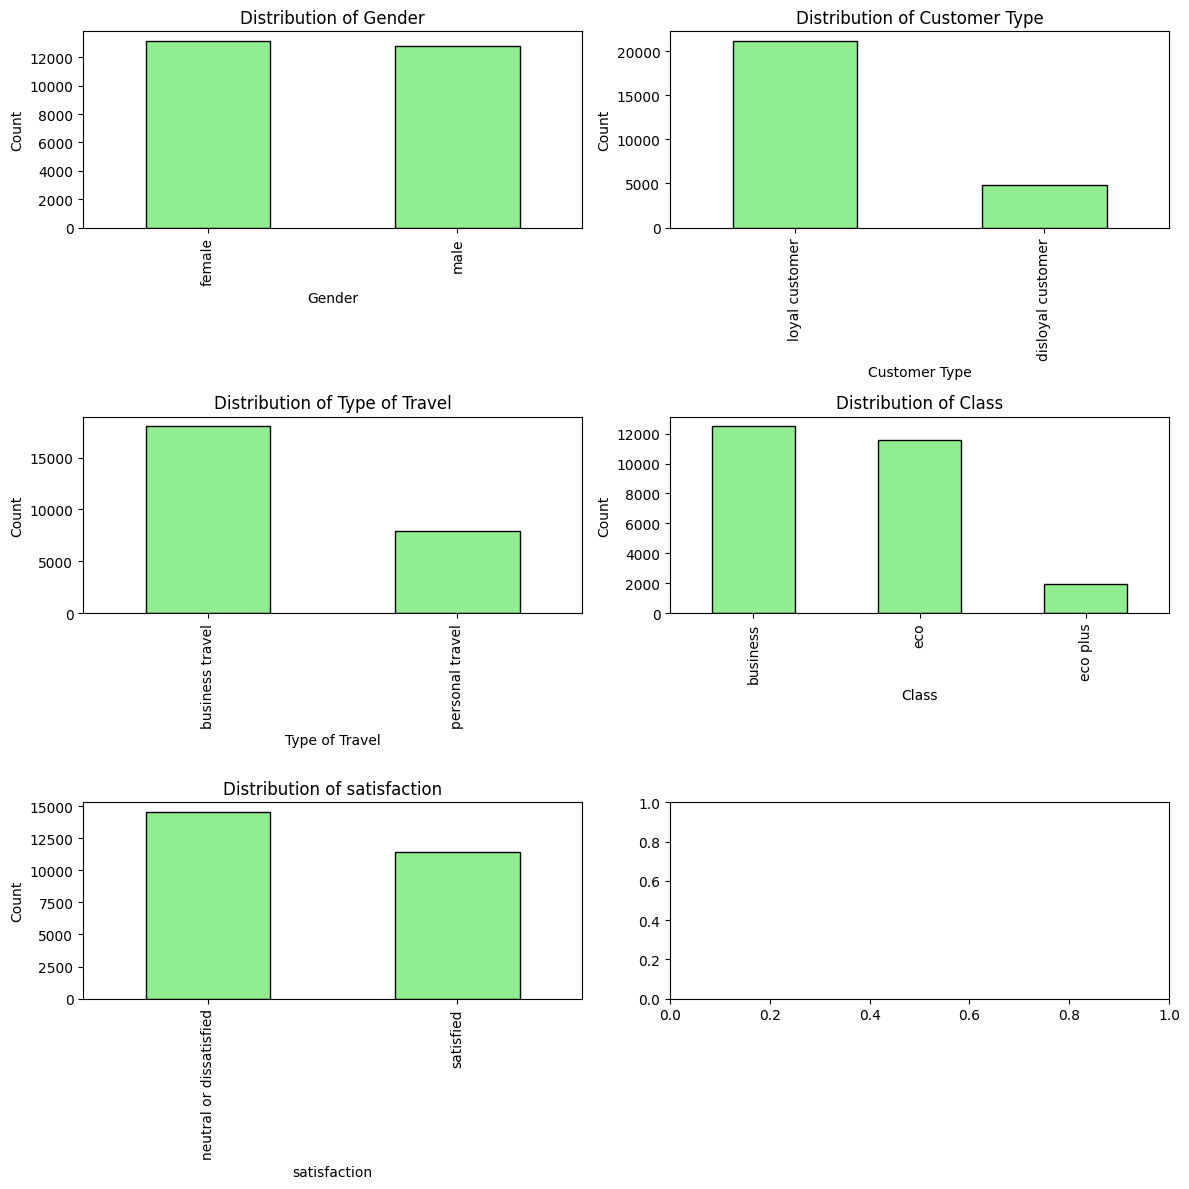

In [3]:
import matplotlib.pyplot as plt

# Univariate Analysis for numerical features: Age, Flight Distance, Departure Delay, Arrival Delay
numerical_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Plotting histograms for numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, feature in enumerate(numerical_features):
    ax = axes[i//2, i%2]
    ax.hist(df_cleaned[feature], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Univariate Analysis for categorical features: Gender, Customer Type, Type of Travel, Class, Satisfaction
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# Plotting bar plots for categorical features
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, feature in enumerate(categorical_features):
    ax = axes[i//2, i%2]
    df_cleaned[feature].value_counts().plot(kind='bar', ax=ax, color='lightgreen', edgecolor='black')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


#### 1. **Numerical Features**:
- **Age**: The distribution of age is roughly unimodal, with a concentration around the 30–50 age range. Most passengers seem to fall within this age bracket.
- **Flight Distance**: The distribution shows a wide range of flight distances, with many passengers traveling shorter distances, though some long-distance flights are also common.
- **Departure Delay in Minutes**: The distribution is heavily skewed towards zero, indicating that most flights departed on time, but there are significant outliers with substantial delays.
- **Arrival Delay in Minutes**: Similar to the departure delay, most flights arrived on time, though there are notable cases with long delays.

#### 2. **Categorical Features**:
- **Gender**: The distribution shows a fairly even split between male and female passengers.
- **Customer Type**: A larger proportion of passengers are loyal customers compared to disloyal customers.
- **Type of Travel**: Business travel is more common than personal travel among passengers.
- **Class**: The majority of passengers fly in economy class, followed by business class, with eco plus being the least common.
- **Satisfaction**: The target variable shows that a significant proportion of passengers are either neutral or dissatisfied, compared to those who are satisfied.

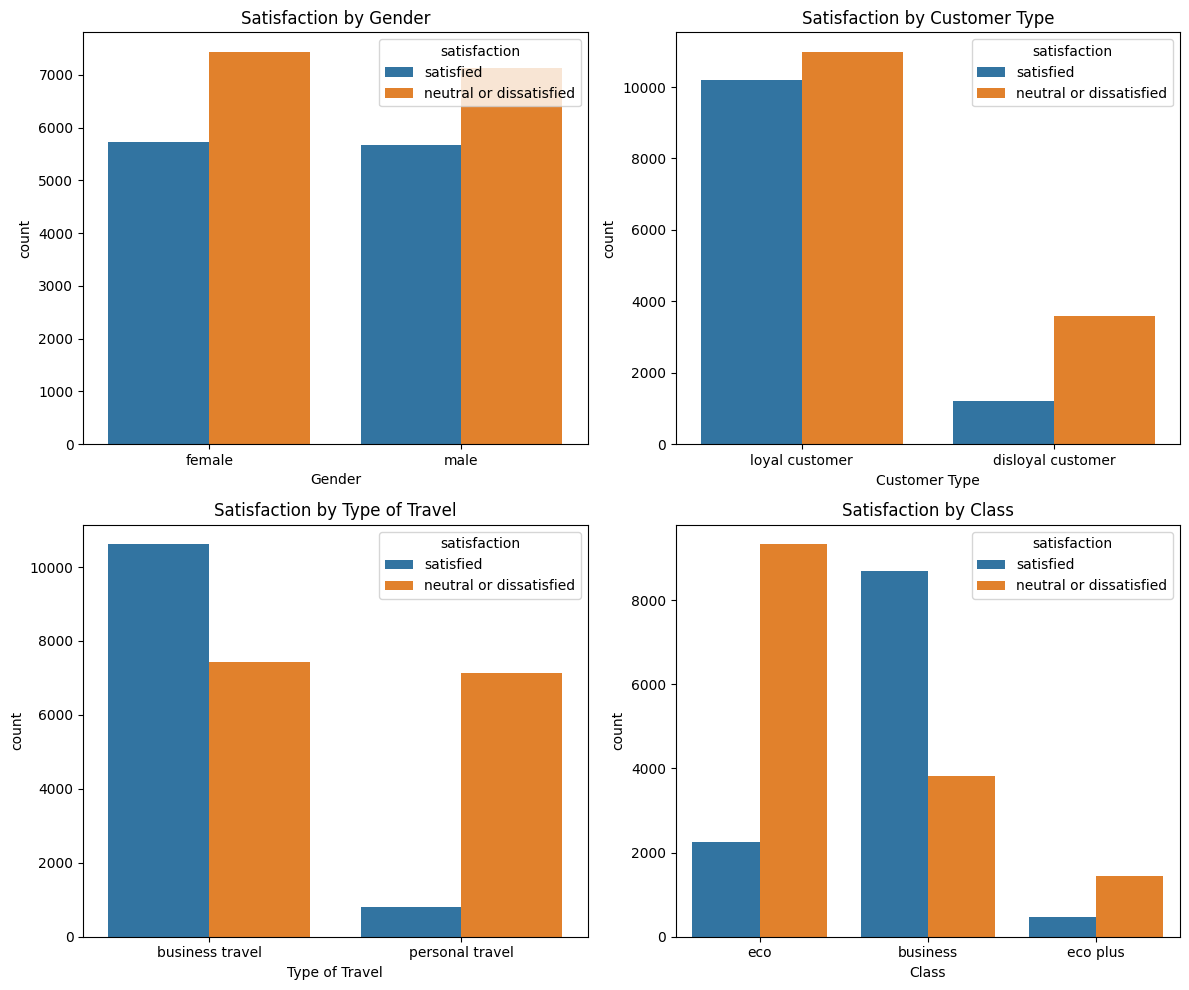

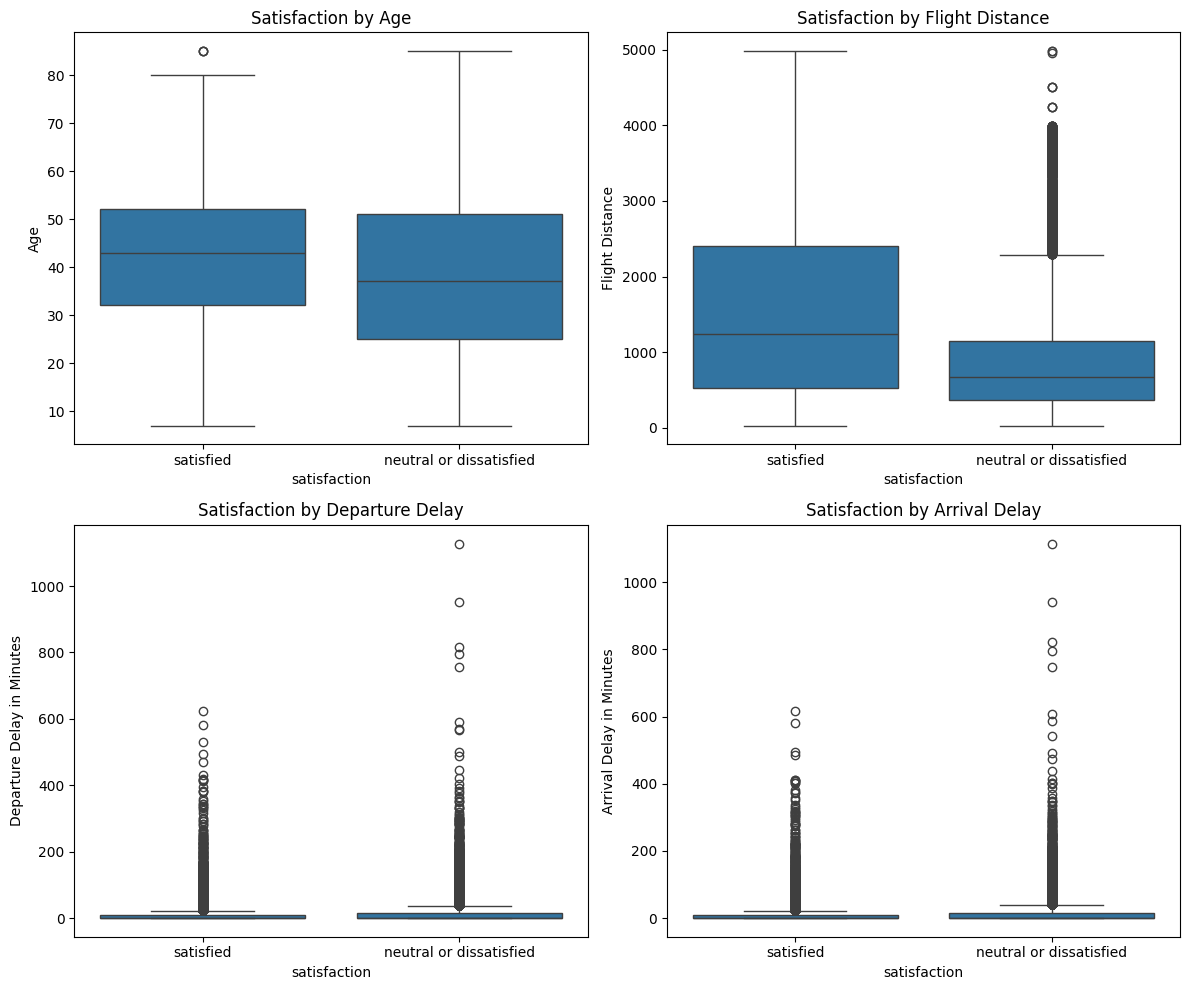

In [4]:
import seaborn as sns

# Setting up the canvas for plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Bivariate Analysis for Categorical Variables
sns.countplot(x='Gender', hue='satisfaction', data=df_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('Satisfaction by Gender')

sns.countplot(x='Customer Type', hue='satisfaction', data=df_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Satisfaction by Customer Type')

sns.countplot(x='Type of Travel', hue='satisfaction', data=df_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Satisfaction by Type of Travel')

sns.countplot(x='Class', hue='satisfaction', data=df_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Satisfaction by Class')

plt.tight_layout()
plt.show()

# Bivariate Analysis for Numerical Variables using boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age and Satisfaction
sns.boxplot(x='satisfaction', y='Age', data=df_cleaned, ax=axes[0, 0])
axes[0, 0].set_title('Satisfaction by Age')

# Flight Distance and Satisfaction
sns.boxplot(x='satisfaction', y='Flight Distance', data=df_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Satisfaction by Flight Distance')

# Departure Delay and Satisfaction
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=df_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Satisfaction by Departure Delay')

# Arrival Delay and Satisfaction
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=df_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Satisfaction by Arrival Delay')

plt.tight_layout()
plt.show()


#### 1. **Satisfaction vs. Categorical Variables**:
- **Gender**: The satisfaction levels between male and female passengers appear to be quite similar, with no significant differences in the proportion of satisfied versus neutral or dissatisfied customers.
- **Customer Type**: Loyal customers show a much higher proportion of satisfaction compared to disloyal customers, where the majority are neutral or dissatisfied.
- **Type of Travel**: Passengers traveling for business tend to be more satisfied compared to those traveling for personal reasons, where dissatisfaction is more common.
- **Class**: Passengers in business class are predominantly satisfied, whereas economy class passengers tend to be neutral or dissatisfied. Eco plus shows a mix, but leans more towards satisfaction compared to economy.

#### 2. **Satisfaction vs. Numerical Variables**:
- **Age**: There appears to be no significant difference in satisfaction based on age. Passengers across age groups show similar levels of satisfaction.
- **Flight Distance**: Longer flights tend to be associated with higher dissatisfaction, while shorter flights show a more even distribution between satisfaction and dissatisfaction.
- **Departure Delay**: Delays at departure seem to have an impact on dissatisfaction. Flights with longer departure delays show a higher rate of dissatisfaction.
- **Arrival Delay**: Similar to departure delays, longer arrival delays also correlate with lower satisfaction levels, indicating that punctuality is an important factor for customer satisfaction.

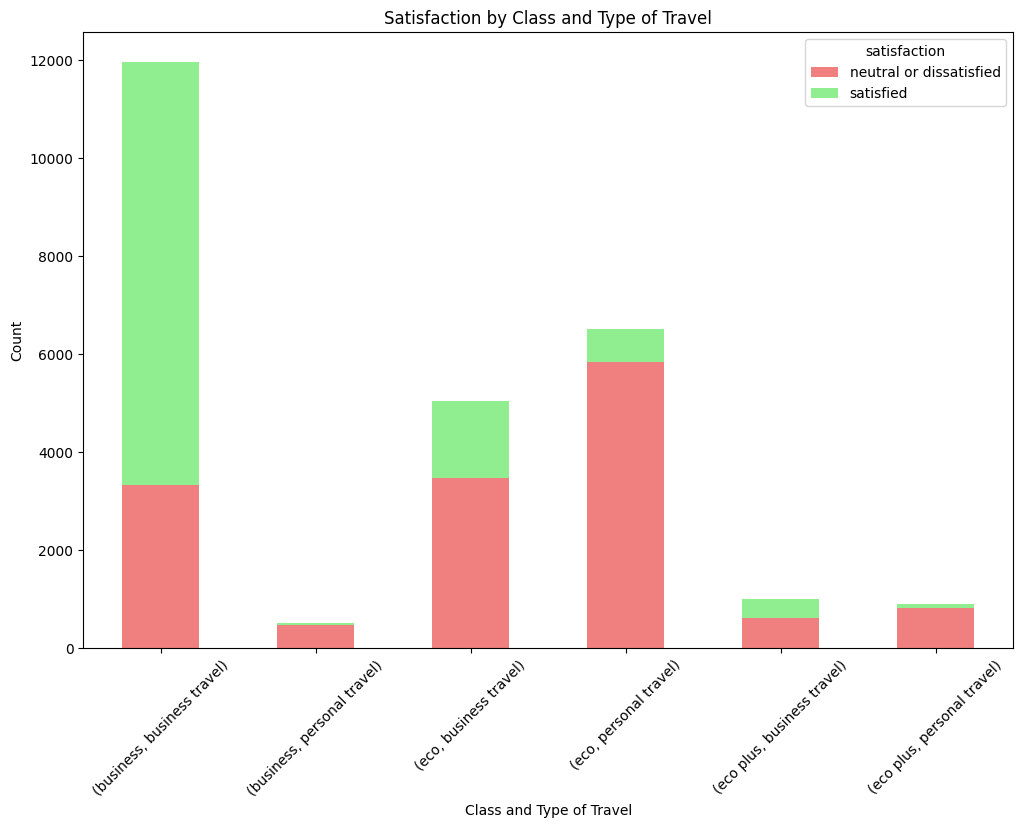

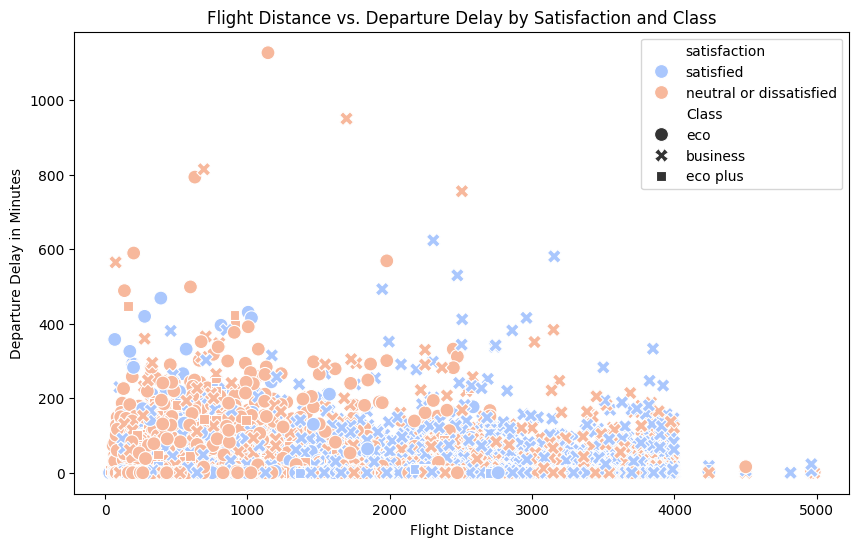

In [5]:
# Multivariate Analysis: Class and Type of Travel vs. Satisfaction

# Creating a crosstab to visualize the relationship between Class, Type of Travel, and Satisfaction
class_travel_satisfaction = pd.crosstab(index=[df_cleaned['Class'], df_cleaned['Type of Travel']],
                                        columns=df_cleaned['satisfaction'])

# Plotting a stacked bar plot for Class and Type of Travel vs. Satisfaction
class_travel_satisfaction.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightcoral', 'lightgreen'])
plt.title('Satisfaction by Class and Type of Travel')
plt.xlabel('Class and Type of Travel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Multivariate Analysis: Flight Distance, Delays, and Class vs. Satisfaction
# We will use a scatter plot for visualizing the relationship between Flight Distance, Delays, and Satisfaction with color coding for Class

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Flight Distance', y='Departure Delay in Minutes', hue='satisfaction', style='Class', data=df_cleaned, palette='coolwarm', s=100)
plt.title('Flight Distance vs. Departure Delay by Satisfaction and Class')
plt.xlabel('Flight Distance')
plt.ylabel('Departure Delay in Minutes')
plt.show()


#### 1. **Class and Type of Travel vs. Satisfaction**:
- **Business Class + Business Travel**: This combination shows a significant proportion of satisfied customers, indicating that business travelers in business class are generally more content with their experience.
- **Economy Class + Personal Travel**: This combination exhibits a higher proportion of neutral or dissatisfied customers, indicating that personal travelers in economy class are more likely to be unhappy with their flight experience.
- **Eco Plus**: Satisfaction levels in eco plus are more balanced, but still lean towards higher satisfaction when compared to economy class.

#### 2. **Flight Distance, Departure Delay, and Class vs. Satisfaction**:
- **Short Flights**: On shorter flights with minimal delays, passengers in all classes tend to be more satisfied.
- **Long Flights + Delays**: As flight distances and delays increase, satisfaction tends to drop significantly, especially for passengers in economy class. Business class passengers appear to tolerate delays better, although their satisfaction still decreases as delays grow.
- **Class Impact**: Business class passengers consistently show higher satisfaction across most flight distances and delay scenarios compared to economy class, highlighting the importance of service quality and amenities.


### 4. **Feature Engineering**
   **Objective**: Create new features or modify existing ones to improve the predictive power of the model.

   - **Tasks**:
     - **Encoding Categorical Variables**: Convert categorical features like "Gender", "Class", and "Customer Type" into numeric values using one-hot encoding or label encoding.
     - **Handling Ordinal Data**: Features such as "Inflight wifi service" and "Seat comfort" represent ordinal data and need ordinal encoding to preserve the rank order.
     - **New Features**: Combine features if necessary. For example, total delay time by summing "Departure Delay in Minutes" and "Arrival Delay in Minutes".
     - **Normalization and Scaling**: Scale numerical features like "Flight distance" and "Age" for algorithms sensitive to feature scale (e.g., SVM, k-NN).


---


In [6]:
# 1. Encoding Categorical Variables using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

# 2. Create Total Delay feature (combining departure and arrival delays)
df_encoded['Total Delay in Minutes'] = df_encoded['Departure Delay in Minutes'] + df_encoded['Arrival Delay in Minutes']

# 3. Normalizing continuous features (Age, Flight Distance, and Total Delay)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[['Age', 'Flight Distance', 'Total Delay in Minutes']] = scaler.fit_transform(
    df_encoded[['Age', 'Flight Distance', 'Total Delay in Minutes']]
)

# Creating the interaction feature for Type of Travel (Personal Travel) and Class (Eco, Eco Plus)
df_encoded['Travel_Class_Interaction'] = df_encoded['Type of Travel_personal travel'] * df_encoded['Class_eco'] * df_encoded['Class_eco plus']

# Display the updated structure of the dataset
df_encoded.head()



,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_male,Customer Type_loyal customer,Type of Travel_personal travel,Class_eco,Class_eco plus,Total Delay in Minutes,Travel_Class_Interaction
0,0.576923,0.026050,5,4,3,4,3,4,3,5,...,50,44.0,satisfied,False,True,False,True,False,0.041908,False
1,0.371795,0.571890,1,1,3,1,5,4,5,4,...,0,0.0,satisfied,False,True,False,False,False,0.000000,False
2,0.166667,0.032512,2,0,2,4,2,2,2,2,...,0,0.0,neutral or dissatisfied,True,False,False,True,False,0.000000,False
3,0.474359,0.675687,0,0,0,2,3,4,4,1,...,0,6.0,satisfied,True,True,False,False,False,0.002675,False
4,0.538462,0.232431,2,3,4,3,4,1,2,2,...,0,20.0,satisfied,False,True,False,True,False,0.008917,False


#### 1. **One-Hot Encoding**:
- Categorical variables such as "Gender", "Customer Type", "Type of Travel", and "Class" were converted into numerical representations using one-hot encoding. 

#### 2. **Total Delay Feature**:
- A new feature, **"Total Delay in Minutes"**, was created by combining the departure and arrival delays. This feature has been scaled for use in the model.

#### 3. **Feature Scaling**:
- Continuous features like **"Age"**, **"Flight Distance"**, and **"Total Delay in Minutes"** were normalized using MinMax scaling to ensure they are on the same scale for improved model performance.

#### 4. **Interaction Feature**:
- An interaction feature, **"Travel_Class_Interaction"**, was created to represent the combined effect of **"Type of Travel"** (Personal Travel) and **"Class"** (Economy, Eco Plus) on satisfaction.


### 5. **Correlation and Feature Importance Analysis**
   **Objective**: Identify the relationships between features and determine which are most strongly correlated with the target variable ("Satisfaction").

   - **Tasks**:
     - Generate a correlation matrix to visualize relationships between numerical features.
     - Evaluate feature importance using statistical methods or simple models (e.g., Random Forest feature importance).
   
---



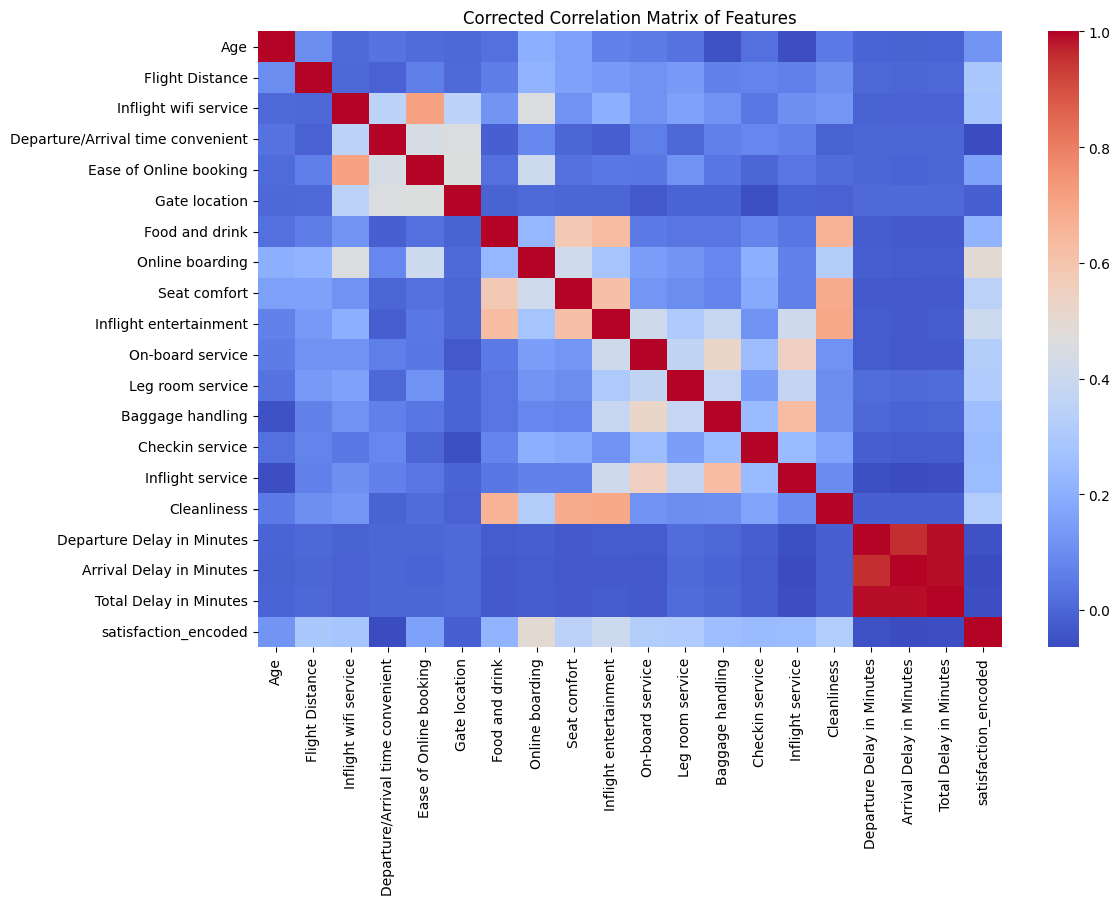

,Feature,Importance
7,Online boarding,0.182905
2,Inflight wifi service,0.138970
20,Type of Travel_personal travel,0.110980
9,Inflight entertainment,0.065236
21,Class_eco,0.057590


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the 'Satisfaction' column to numeric values for correlation analysis
label_encoder = LabelEncoder()
df_encoded['satisfaction_encoded'] = label_encoder.fit_transform(df_encoded['satisfaction'])

# Correlation Matrix
# Dropping the non-numeric columns for correlation calculation
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Recalculating the correlation matrix using only numeric columns
correlation_matrix_fixed = df_encoded[numeric_columns].corr()

# Plotting the corrected correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_fixed, annot=False, cmap='coolwarm', cbar=True)
plt.title('Corrected Correlation Matrix of Features')
plt.show()


# Feature Importance using RandomForest
X = df_encoded.drop(columns=['satisfaction', 'satisfaction_encoded'])  # Features
y = df_encoded['satisfaction_encoded']  # Target

# Build a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Get feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


# Display top feature importances
feature_importances.head()


#### 1. **Correlation Matrix**:
- The correlation heatmap provides an overview of the relationships between numerical features.
- Notably, features such as **"Online boarding"**, **"Inflight wifi service"**, and **"Inflight entertainment"** show moderate correlations with the satisfaction-encoded target.
- Other features like **"Departure Delay"** and **"Arrival Delay"** also have weak but notable correlations with customer satisfaction, indicating the importance of punctuality in determining satisfaction.

#### 2. **Feature Importance** (Random Forest Model):
- The top 5 most important features for predicting customer satisfaction are:
  1. **Online boarding**: The ease of boarding seems to be the most significant factor in determining customer satisfaction.
  2. **Inflight wifi service**: The quality of wifi service during the flight also plays a crucial role in customer satisfaction.
  3. **Type of Travel (Personal Travel)**: Whether the customer is traveling for personal reasons or business impacts their satisfaction levels.
  4. **Inflight entertainment**: Access to entertainment during the flight influences customer experience.
  5. **Class (Economy)**: The class of travel, especially economy class, is an important factor in determining satisfaction.

These findings suggest that inflight services and the travel experience (boarding, wifi, entertainment, class) are strong determinants of satisfaction.

# Parte 2

In [10]:
from sklearn.model_selection import train_test_split

# Dividir os dados em variáveis de entrada (X) e variável alvo (y)
X = df_encoded.drop(columns=['satisfaction', 'satisfaction_encoded'])
y = df_encoded['satisfaction_encoded']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizar as primeiras linhas de X e y após o pré-processamento
X_train.head(), y_train.head()

(            Age  Flight Distance  Inflight wifi service  \
 10324  0.782051         0.128433                      0   
 9946   0.282051         0.192649                      3   
 10052  0.282051         0.539782                      2   
 3511   0.025641         0.445880                      1   
 21934  0.141026         0.297456                      0   
 
        Departure/Arrival time convenient  Ease of Online booking  \
 10324                                  4                       0   
 9946                                   3                       3   
 10052                                  2                       3   
 3511                                   5                       1   
 21934                                  4                       0   
 
        Gate location  Food and drink  Online boarding  Seat comfort  \
 10324              2               5                5             4   
 9946               3               4                3             4   
 10052

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dicionário para armazenar os resultados
results = {}

# Função para calcular e armazenar as métricas de avaliação
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    }

# 1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test, "Decision Tree")

# 2. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, X_test, y_test, "K-Nearest Neighbors")

# 3. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# 4. Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, X_test, y_test, "Support Vector Machine")

# Exibir resultados como um dataframe
results_df = pd.DataFrame(results)
results_df


,Decision Tree,K-Nearest Neighbors,Random Forest,Support Vector Machine
Accuracy,0.929946,0.866243,0.949769,0.853349
Precision,0.930045,0.866192,0.949744,0.853611
Recall,0.929946,0.866243,0.949769,0.853349
F1 Score,0.929982,0.865752,0.949738,0.852517


### Um breve comentário sobre Métricas de Avaliação

1. **Accuracy**: 
   - Representa a proporção de previsões corretas entre todas as previsões feitas. Uma alta acurácia indica que o modelo faz uma grande quantidade de previsões corretas.
   - No contexto dos modelos, o Random Forest obteve a maior acurácia (0.949769), seguido de perto pelo Decision Tree (0.929946), indicando que ambos os modelos conseguem prever corretamente a satisfação dos clientes na maioria dos casos.

2. **Precision**:
   - Mede a proporção de verdadeiros positivos entre todos os positivos preditos. Uma alta precisão significa que o modelo gera poucos falsos positivos, ou seja, quando prevê que o cliente está satisfeito, ele geralmente está correto.
   - Novamente, o Random Forest apresenta o maior valor (0.949744), seguido de perto pelo Decision Tree (0.930045), indicando que ambos são confiáveis em prever corretamente clientes satisfeitos sem muitos falsos alarmes.

3. **Recall**:
   - Refere-se à capacidade do modelo de encontrar todos os exemplos positivos corretos, ou seja, quantos dos clientes verdadeiramente satisfeitos foram corretamente classificados como tal. Um recall alto significa que o modelo erra poucos positivos reais (clientes satisfeitos).
   - O Random Forest se destaca novamente com o maior recall (0.949769), seguido pelo Decision Tree. Isso sugere que ambos conseguem identificar quase todos os clientes satisfeitos, com o Random Forest capturando a maior parte desses exemplos.

4. **F1 Score**:
   - A média harmônica de precisão e recall, que é útil para avaliar modelos em casos com classes desbalanceadas. Um valor alto de F1-score indica um bom equilíbrio entre precisão e recall.
   - O Random Forest apresenta o maior F1-score (0.949738), confirmando sua eficácia em balancear precisão e recall, seguido do Decision Tree (0.929982), que também mantém um equilíbrio forte.

### Comparação entre os Modelos

- **Random Forest**: Com os melhores valores em todas as métricas, o Random Forest é o modelo mais adequado para prever a satisfação do cliente, mostrando um bom equilíbrio entre precisão e recall. Isso ocorre porque o Random Forest, ao combinar várias árvores de decisão, é capaz de generalizar melhor e evitar overfitting.
  
- **Decision Tree**: Com valores altos em todas as métricas, o Decision Tree é uma opção viável e competitiva, mas um pouco menos precisa e confiável que o Random Forest. A árvore de decisão é menos robusta individualmente, o que pode explicar a diferença sutil em relação ao Random Forest.

- **K-Nearest Neighbors (KNN)**: O KNN apresenta métricas ligeiramente inferiores, possivelmente devido à alta dimensionalidade do dataset, que pode impactar sua eficiência e precisão, além da dependência da métrica de distância entre os pontos.

- **Support Vector Machine (SVM)**: Com o desempenho mais baixo, o SVM pode estar sendo afetado pela complexidade e diversidade dos dados. Modelos SVM tendem a ser menos eficientes em dados com ruído ou com características heterogêneas (muitas variáveis categóricas e contínuas).

***Um breve comentário sobre o problema de classificação e outros algorítmos***

Não usamos **regressão linear** ou o método de **gradiente descendente** porque esses métodos são mais indicados para problemas de previsão de valores contínuos, como prever a temperatura, o preço de uma casa ou a altura de uma pessoa. No nosso caso, estamos lidando com um problema de **classificação**, onde queremos saber se um cliente está “satisfeito” ou “não satisfeito”, ou seja, categorias específicas em vez de números.

1. **O que estamos tentando prever**: 
   - A regressão linear é ótima para prever números, mas aqui precisamos prever categorias (satisfeito ou insatisfeito). A regressão linear daria valores intermediários (como 0,8 ou -1,3), que não se traduzem bem em categorias e não fazem sentido para este tipo de pergunta.
  
2. **Como o gradiente descendente funciona**:
   - O gradiente descendente, embora seja uma técnica poderosa, é mais um método de otimização que ajusta pesos dentro de modelos complexos, como redes neurais. Ele sozinho não é suficiente para a classificação e precisa de uma função de erro que faça sentido para classes. Ou seja, para separar categorias, o gradiente descendente só funciona bem dentro de modelos específicos, como redes neurais ou regressão logística, que são projetados para esse tipo de problema.

3. **Dificuldade em interpretar valores contínuos para classes**:
   - A regressão linear assume que há uma relação direta e linear entre as variáveis que usamos para prever e o resultado final. Mas, em classificação, isso não acontece de forma tão simples. Usar uma linha reta para prever classes, especialmente em dados complexos, gera resultados que não se encaixam bem nas categorias que queremos.

4. **Modelos melhores para classificação**:
   - Temos algoritmos específicos para classificação, como árvores de decisão, Random Forest e SVM, que foram criados exatamente para separar bem classes diferentes. Esses modelos conseguem lidar melhor com variáveis categóricas e, em geral, têm uma precisão maior para essa tarefa.